# Use linear regression to find the relationship between the salary and the year experience.
Data Source: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

### Select a Model

Let's use a Simple Linear Regression (SLR) model.

We can express the SLR in this mathematical expression: 
$$ \hat{y_i} = \theta_0 + \theta_1x_i$$

- $\theta_0$: the term of a intercept
- $\theta_1$: the term of a slope

Since we want to create an efficient model, we are going to choose values for $\theta_0, \theta_1$ that can accurately predict the output variable. The most optimzied parameters can be defined by $\hat{\theta_0}$ and $\hat{\theta_1}$:

$$\hat{\theta_0} = \bar{y} - \hat{\theta_1}\bar{x}$$
$$\hat{\theta_1} = r\frac{\sigma_y}{\sigma_x}$$

### Select a Loss Function

We can now choose a loss function to find the best line that describes the relationship between the amount of year experience and the salary.

In this case, we will use the squared loss (L2 loss) as a loss function. Since, it squares the difference between the observed $y_i$ and the predicted $\hat{y_i}$, it can penalize large size errors.

$$L(y_i, \hat{y_i}) = (y_i - \hat{y_i})^2$$

To apply on the entire dataset, we calculate the average loss across all data points: we call this a cost function:

$$\hat{R}(\theta) = \frac{1}{n}\sum_{i=1}^nL(y_i, \hat{y_i})$$

This is called the __Mean Squared Error (MSE)__ and it will be used as a standard loss function.

### Fit the Model

Since we select the model and a loss function, it's time to choose the bset set of model parameters that can minimize the model (this is called fitting).

1. We partial derivative the cost function on both $\theta_0$ and $\theta_1$.

$$\frac{\partial}{\partial\theta_0}MSE = \frac{-2}{n}\sum_{i=1}^n(y_i - \theta_0 - \theta_1x_i)$$

$$\frac{\partial}{\partial\theta_1}MSE = \frac{-2}{n}\sum_{i=1}^n(y_i - \theta_0 - \theta_1x_i)x_i$$

2. Then we set the derivatives equal to 0.

* $\hat{y_i} = \theta_0 + \theta_1x_i$

* $\frac{\partial}{\partial\theta_0}MSE = \frac{-2}{n}\sum_{i=1}^n(y_i - \theta_0 - \theta_1x_i) = 0$
$$\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y_i}) = 0$$

* $\frac{\partial}{\partial\theta_1}MSE = \frac{-2}{n}\sum_{i=1}^n(y_i - \theta_0 - \theta_1x_i)x_i$

$$\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y_i})x_i = 0$$

3. Finally, we solve these equations to get the estimates of $\hat{\theta_0}$ and $\hat{\theta_1}$.

$$\frac{\partial}{\partial\theta_0}MSE = \frac{-2}{n}\sum_{i=1}^n(y_i - \theta_0 - \theta_1x_i) = 0$$

The sum of $y_i$ divide by $n$ is $\bar{y}$ and the sum of $x_i$ divide by $n$ is $\bar{x}$. $n\hat{\theta_0}$ divide by $n$ is just $\hat{\theta_0}$.  Therefore, the estimate of $\hat{\theta_0}$:

$$\hat{\theta_0} = \bar{y} - \hat{\theta_1}\bar{x}$$

Now let's solve for the $\hat{\theta_1}$:

We first multiply the first equation by $\bar{x}$ and subtract from the second equation:

$$\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y_i})x_i - \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y_i})\bar{x} = 0$$

Group by $(y_i - \hat{y_i})$ and plug in the $\hat{y_i} = \bar{y} + \hat{\theta_i}(x_i - \bar{x})$:

$$\frac{1}{n}\sum_{i=1}^n(y_i - \bar{y} - \hat{\theta_1}(x - \bar{x}))(x_i - \bar{x}) = 0$$

Solve by $\hat{\theta_1}$:

$$\frac{1}{n}\sum_{i=1}^n(y_i - \bar{y})(x_i - \bar{x}) = \hat{\theta_1} * \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2$$

Substitute by correlation: $r$, and standard deviation of x: $\sigma{x}$

$$r\sigma_x\sigma_y = \hat{\theta_1} * \sigma^2_x$$

$$\hat{\theta_1} = r\frac{\sigma_x}{\sigma_y}


### Now we evaluate the SLR model

Let's first plot the original data and compute each variable's mean and sd. If predictions' means and standard deviations are close to the original observed $y_i$'s, we can say that the model has been generated correctly. We also can calculate the correlation $r$ to check if our model is done well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

experience_salary = pd.read_csv("Salary_dataset.csv")
experience_salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [2]:
# remove the "Unnnamed: 0" column
experience_salary = experience_salary.drop("Unnamed: 0", axis="columns")

In [3]:
experience_salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Let's create a scatter plot to analyze the dataset.  

<Axes: xlabel='YearsExperience', ylabel='Salary'>

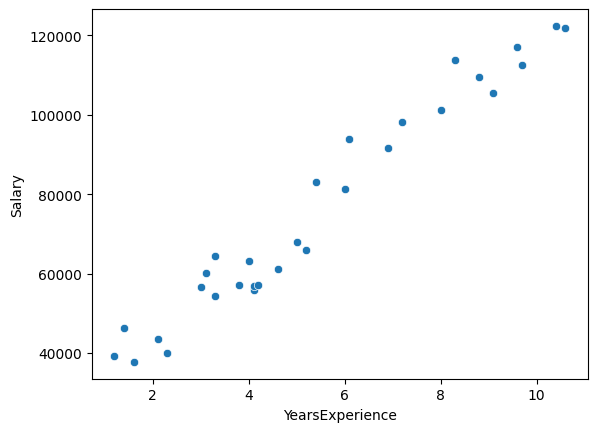

In [4]:
sns.scatterplot(data=experience_salary, x="YearsExperience", y="Salary")

Seems our dataset looks linear...Let's plot a regression line of best fit.

We need some helper functions to compute our prediction.

To create a regression line...
1. slope = correlation * (sd of y / sd of x)
2. y-intercept = mean of y - slope * mean of x
3. regression estimate = y-intercept + slope * x

standard unit: to convert our $x_i$ (original unit) to standard unit, subtract the mean of $x$ and divide by the sd of $x$:

$$\frac{x_i - \bar{x}}{\sigma_x}$$

correlation: the average of the product of x and y (they are measured in standard units)

$$r = \frac{1}{n}\sum_{i=1}^n(\frac{x_i - \bar{x}}{\sigma_x})(\frac{y_i - \bar{y}}{\sigma_y})$$

slope: the slope of our regression line is the product of correlation and the division of sd of y and sd of x

$$slope = r * \frac{\sigma_y}{\sigma_x}$$

intercept: it's a difference between the average of y and the product of slope and the average of x

$$intercept = \sigma_y - slope * \sigma_x$$

linear regression model: the model that we will use (we should select the best set of model parameters that can minimize)
* $\theta_0$: intercept
* $\theta_1$: slope

$$\hat{y_i} = \theta_0 + \theta_1x_i$$

cost function (with using L2 loss as a loss function): our cost function will use a L2 loss -> now we call it __Mean Squared Error (MSE)__

$$\hat{R}(\theta) = \frac{1}{n}\sum_{i=1}^nL(y_i, \hat{y_i})$$


In [5]:
def convert_to_standard_unit(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(convert_to_standard_unit(x) * convert_to_standard_unit(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

def theta_zero_and_one(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def regression_model(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def MSE(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def show_every_evaluation(x, y, theta_0, theta_1, y_hat):
    print("Average of x:", np.mean(x), "Average of y:", np.mean(y))
    print("Standard Deviation of x:", np.std(x), "Standard Deviation of y:", np.std(y))
    print("Correlation of x and y:", correlation(x, y))
    print("theta_0:", theta_0, "theta_1:", theta_1)
    print("y_hat =", theta_0, "+", theta_1, "* x")
    print("RMSE (root mean squared error):", MSE(y, y_hat) ** (1 / 2))

### Now let's visualize our prediction as a regression line into our scatterplot

Average of x: 5.413333333333332 Average of y: 76004.0
Standard Deviation of x: 2.790189161249745 Standard Deviation of y: 26953.65024877583
Correlation of x and y: 0.9782416184887598
theta_0: 24848.2039665232 theta_1: 9449.962321455076
y_hat = 24848.2039665232 + 9449.962321455076 * x
RMSE (root mean squared error): 5592.04360876066


None

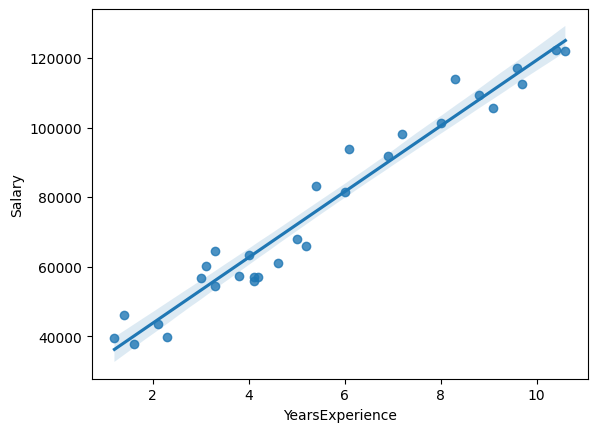

In [6]:
x = experience_salary["YearsExperience"]
y = experience_salary["Salary"]

theta_0, theta_1 = theta_zero_and_one(x, y)
y_hat = regression_model(x, theta_0, theta_1)
sns.regplot(x="YearsExperience", y="Salary", data=experience_salary)
display(show_every_evaluation(x, y, theta_0, theta_1, y_hat))

### Let's analyze our model's residuals.
We can generate a residual plot of $e_i = y_i - \hat{y_i}$ to check the difference between the original and predict values. 

If our residual plot does not show any pattern with $x_i$ and $e_i$, our linear model fits the data well.

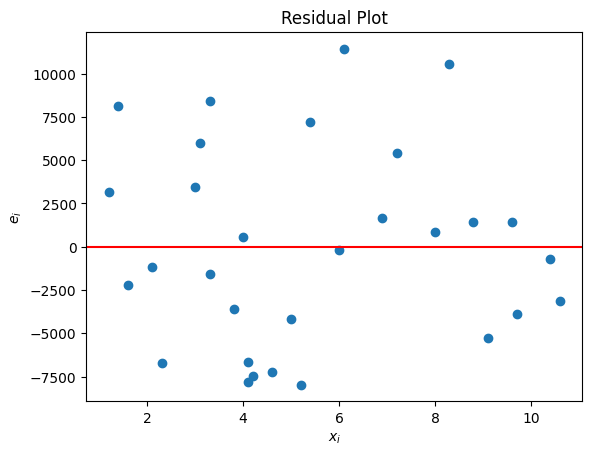

In [7]:
plt.scatter(x, y - y_hat)
plt.axhline(y=0, color='red', linestyle='-') # plot a residual line
plt.title('Residual Plot')
plt.xlabel('$x_i$')
plt.ylabel('$e_i$')
plt.show()

### Great! There is no pattern on our Residual Plot so our model is a good fit!